In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [8]:
data = pd.read_csv('crop_data.csv')
data.head()

,INDEX,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
0,1,24046157,2018-06-01 00:57:59,33.808750,-118.298480,182.0,73.00000,FLEET51,379816.173355,3.741709e+06,2018-05-31 17:57:59 -0700
1,13,4644114056,2018-06-01 00:58:50,33.790882,-118.140198,348.0,0.00000,FLEET44,394445.225261,3.739554e+06,2018-05-31 17:58:50 -0700
2,18,5c3d03bf4888e7c27bb1da53f4b6b4e2,2018-06-01 00:59:22,33.811665,-118.176650,89.0,0.00000,FLEET05,391096.765695,3.741896e+06,2018-05-31 17:59:22 -0700
3,21,0C01B72E00,2018-06-01 00:59:20,33.812690,-118.139160,3.0,41.84284,FLEET41,394568.037470,3.741971e+06,2018-05-31 17:59:20 -0700
4,30,0C03CB7B00,2018-06-01 00:59:16,33.715950,-118.006730,178.0,8.04670,FLEET41,406720.503841,3.731117e+06,2018-05-31 17:59:16 -0700


In [4]:
print('unique ID count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)

unique ID count 21
unique Probe_ID count 23979
unique time 86102
raw data shape (1989370, 11)


In [16]:
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
print('raw data shape',t1_series.shape)

raw data shape (40, 11)


In [35]:
ID_series = data[data.PROBE_ID == '24046157' ]
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)

raw data shape (148, 11)
raw data shape (357286, 11)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [5]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   


def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

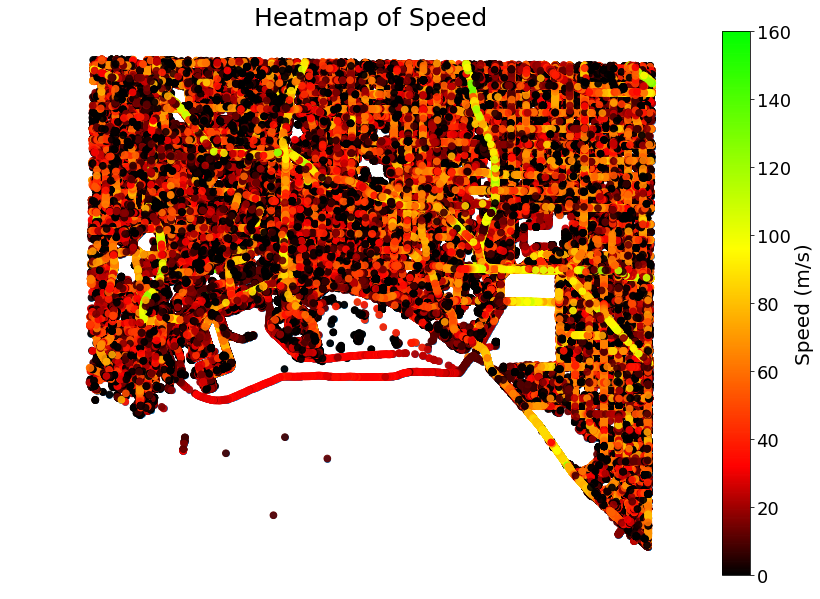

In [32]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

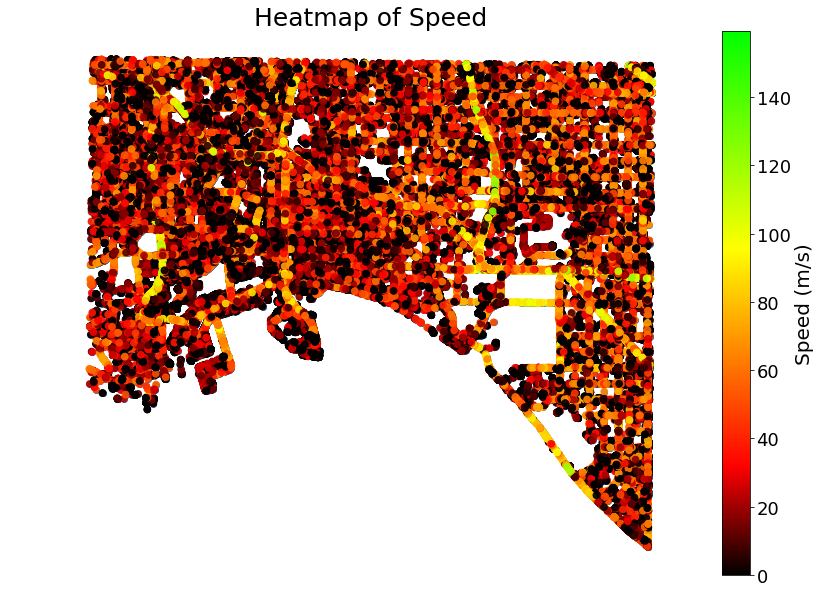

In [36]:
ax = pos_heatmap(fleet_series,'Heatmap of Speed')

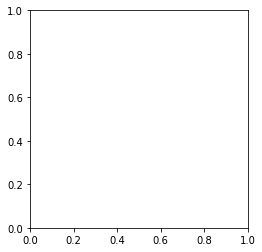

In [31]:
#http://polygons.openstreetmap.fr/get_geojson.py?id=396479&params=0
#https://nominatim.openstreetmap.org/details.php?place_id=198792806
import geopandas as gpd
df_places = gpd.read_file('LA.geojson')
df_places.head()
df_places.plot(ax)

In [ ]:
#simulate the trips (statistical applciation)
#estimate how many people are on the beach